# 1. Seleção

Nesta primeira etapa, definimos a base do nosso projeto.

+ O que fizemos: Extraímos o Adult Data Set (Censo) do repositório da UCI.

+ A nossa escolha: Separamos os dados estruturais (as features, como idade, educação e horas de trabalho) da nossa variável-alvo (target), que é prever se a renda da pessoa ultrapassa os 50 mil dólares anuais.

In [187]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

In [188]:
adult = fetch_ucirepo(id=2)

In [189]:
df = adult.data.features
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [190]:
target = adult.data.targets
target.head()

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K


In [191]:
df["income"] = target

# 2. Pré-Processamento

Aqui, investigamos a qualidade dos dados e lidamos com valores ausentes (como os campos em branco ou preenchidos com "?").

+ O que fizemos: Comparamos empiricamente várias estratégias de limpeza para ver qual ajudava mais o modelo.

+ A nossa escolha: Descobrimos que não remover linhas com dados faltantes era a melhor opção. Ao apagar dados com "?" ou nulos, nossa acurácia caiu para 86,56%. A escolha final foi tratar esses dados ausentes preenchendo-os com a moda (valor mais frequente) e removendo as colunas "education-num", "fnlwgt devido, a feature "education-num" ser apenas um id de "education" feature, falando sobre "fnlwgt" ajuste na distribuição seguindo uma tranformação logmod.

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Metodos</th>
      <th>acurácia</th>
      <th>Modelo</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td> Sem alterações no preprocessamento </td>
      <td> 87,69% </td>
      <td rowspan="9" style="vertical-align: middle;">XGBoost</td>
    </tr>
    <tr>
      <td>Removendo linhas com Valores nulos</td>
      <td> 87,49% </td>
    </tr>
    <tr>
      <td>Substituindo Valores nulos pela moda</td>
      <td> 87,78% </td>
    </tr>
    <tr>
      <td>Substituir nulos pela moda e dropar duplicados</td>
      <td> 87,54% </td>
    </tr>
    <tr>
      <td>Remover linhas com nulos e duplicados</td>
      <td>87,19%</td>
    </tr>
    <tr>
      <td>Remover linhas com valores "?"</td>
      <td>86,56%</td>
    </tr>
    <tr>
      <td>Substituir valores "?" pela moda</td>
      <td>87,59%</td>
    </tr>
    <tr>
      <td>Substituir pela moda valores nulos e "?"</td>
      <td>87,63%</td>
    </tr>
    <tr style="font-weight: bold;">
      <td>Valores nulos pela moda e drop de 2 colunas e ajuste na distribuição de fnlwgt</td>
      <td>87,94%</td>
    </tr>
  </tbody>
</table>
</div>

In [192]:
print(f"Shape inicial: {df.shape}")
df.head()

Shape inicial: (48842, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


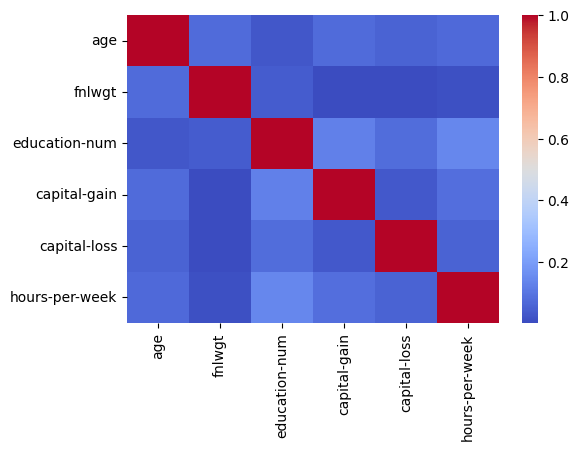

In [194]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = df.select_dtypes(include=['number']).corr().abs()

plt.figure(figsize=(6,4))
sns.heatmap(corr, cmap='coolwarm')
plt.show()

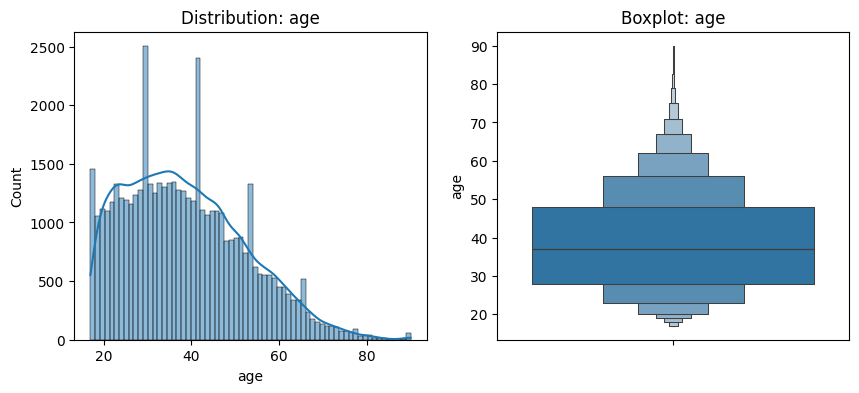

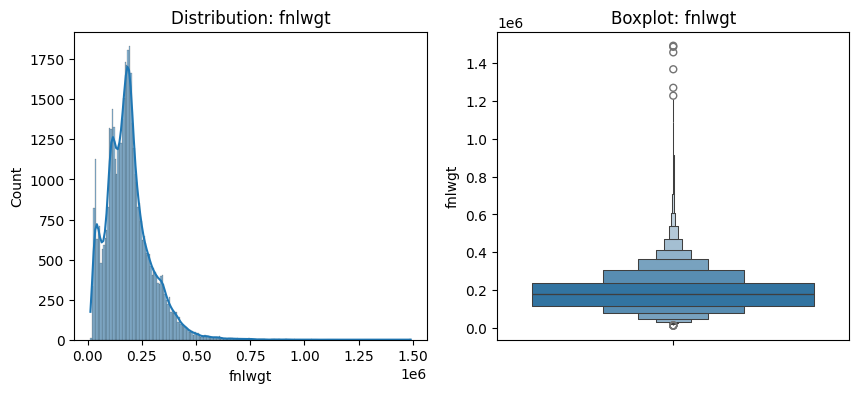

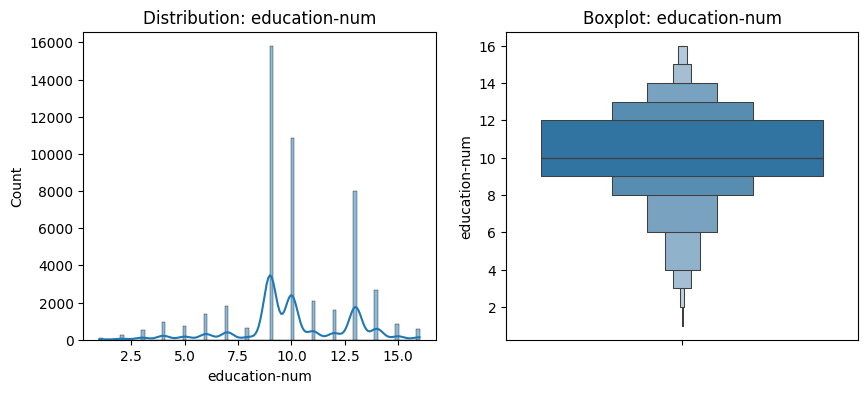

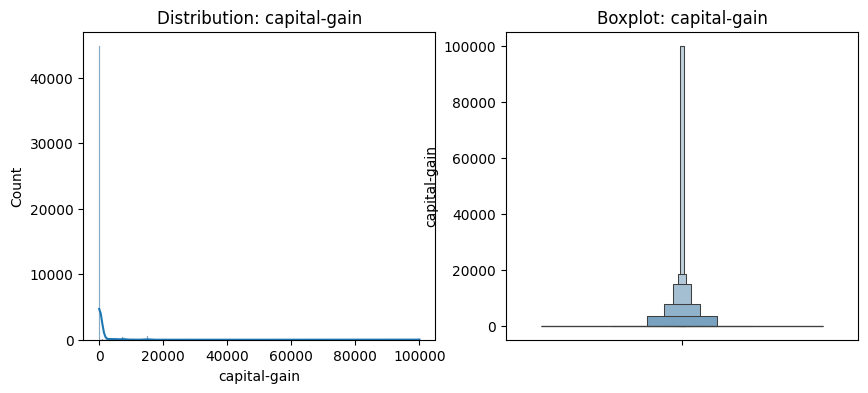

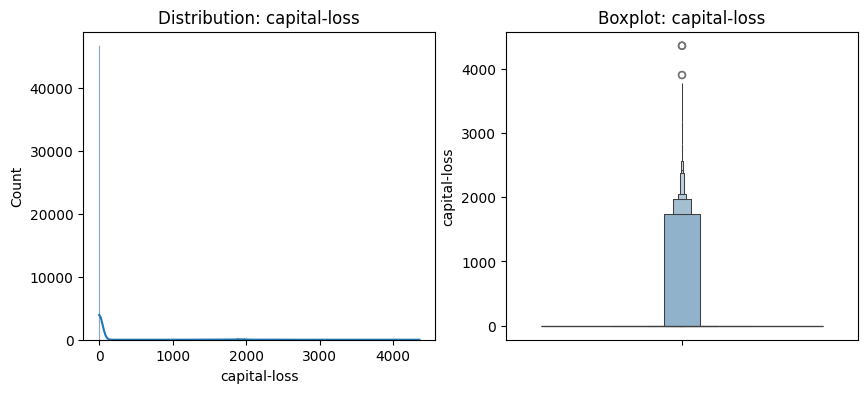

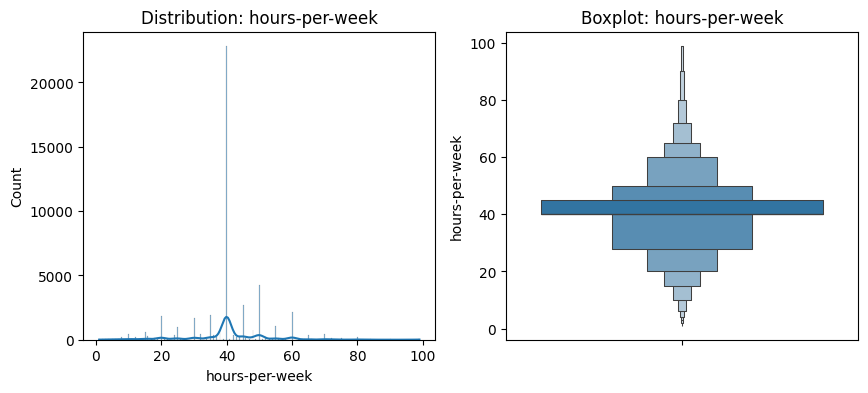

In [195]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = df.select_dtypes(include=['int', 'float'])

for col in num_cols:
    plt.figure(figsize=(10,4))

    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution: {col}')

    plt.subplot(1,2,2)
    sns.boxenplot(df[col])
    plt.title(f'Boxplot: {col}')

    plt.show()

In [196]:
import numpy as np

df['fnlwgt_logmod'] = np.sign(df['fnlwgt']) * np.log1p(np.abs(df['fnlwgt']))

In [197]:
print("Valores ausentes por coluna:")
print(df.isna().sum())
print(f"\nTotal de linhas com valores ausentes: {df.isna().any(axis=1).sum()}")

Valores ausentes por coluna:
age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
fnlwgt_logmod       0
dtype: int64

Total de linhas com valores ausentes: 1221


In [198]:
df[df.isna().any(axis=1)]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,fnlwgt_logmod
32565,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.,11.547308
32567,29,NaN,227026,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K.,12.332824
32574,58,NaN,299831,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,<=50K.,12.610978
32580,40,Private,85019,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,45,NaN,>50K.,11.350642
32583,72,NaN,132015,7th-8th,4,Divorced,NaN,Not-in-family,White,Female,0,0,6,United-States,<=50K.,11.790678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48769,21,NaN,212661,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.,12.267459
48800,73,NaN,144872,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,25,Canada,<=50K.,11.883613
48812,81,NaN,26711,Assoc-voc,11,Married-civ-spouse,NaN,Husband,White,Male,2936,0,20,United-States,<=50K.,10.192868
48826,50,Local-gov,139347,Masters,14,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,NaN,>50K.,11.844730


In [199]:

nan_columns = df.columns[df.isna().any()].tolist()
print(f"Colunas com valores ausentes: {nan_columns}")
for column in nan_columns:
    print(f"Preenchendo valores ausentes na coluna '{column}' com a moda.")
    df[column] = df[column].fillna(df[column].mode()[0])
print("\nVerificação:")
print(df.isna().sum())

Colunas com valores ausentes: ['workclass', 'occupation', 'native-country']
Preenchendo valores ausentes na coluna 'workclass' com a moda.
Preenchendo valores ausentes na coluna 'occupation' com a moda.
Preenchendo valores ausentes na coluna 'native-country' com a moda.

Verificação:
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
fnlwgt_logmod     0
dtype: int64


In [200]:
for col in df.columns:
    n_unique = df[col].nunique()
    print(f"{col} ({n_unique} valores únicos):")
    print(df[col].unique())
    print()

age (74 valores únicos):
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]

workclass (9 valores únicos):
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

fnlwgt (28523 valores únicos):
[ 77516  83311 215646 ... 173449  89686 350977]

education (16 valores únicos):
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']

education-num (16 valores únicos):
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]

marital-status (7 valores únicos):
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']



occupation (15 valores únicos):
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']

relationship (6 valores únicos):
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']

race (5 valores únicos):
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']

sex (2 valores únicos):
['Male' 'Female']

capital-gain (123 valores únicos):
[ 2174     0 14084  5178  5013  2407 14344 15024  7688 34095  4064  4386
  7298  1409  3674  1055  3464  2050  2176   594 20051  6849  4101  1111
  8614  3411  2597 25236  4650  9386  2463  3103 10605  2964  3325  2580
  3471  4865 99999  6514  1471  2329  2105  2885 25124 10520  2202  2961
 27828  6767  2228  1506 13550  2635  5556  4787  3781  3137  3818  3942
   914   401  2829  2977  4934  2062  2354  5455 15020  1424  3273 22040
  4416

In [201]:
print("Valores originais de 'income':")
print(df["income"].unique())

df["income"] = df["income"].str.replace(".", "").str.strip()

print("\nValores após limpeza:")
print(df["income"].unique())

Valores originais de 'income':
['<=50K' '>50K' '<=50K.' '>50K.']

Valores após limpeza:
['<=50K' '>50K']


In [202]:
print("Distribuição de 'occupation':")
print(df["occupation"].value_counts())
print(f"\nRegistros com '?': {(df['occupation'] == '?').sum()}")

Distribuição de 'occupation':
occupation
Prof-specialty       7138
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
?                    1843
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

Registros com '?': 1843


In [203]:
print("Distribuição de 'native-country':")
print(df["native-country"].value_counts())
print(f"\nRegistros com '?': {(df['native-country'] == '?').sum()}")

Distribuição de 'native-country':
native-country
United-States                 44106
Mexico                          951
?                               583
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua      

In [204]:
for col in df.columns:
    n_unique = df[col].nunique()
    print(f"{col} ({n_unique} valores únicos):")
    print(df[col].unique())
    print()

age (74 valores únicos):
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]

workclass (9 valores únicos):
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

fnlwgt (28523 valores únicos):
[ 77516  83311 215646 ... 173449  89686 350977]

education (16 valores únicos):
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']

education-num (16 valores únicos):
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]

marital-status (7 valores únicos):
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

occupation (15 valores únicos):


['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']

relationship (6 valores únicos):
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']

race (5 valores únicos):
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']

sex (2 valores únicos):
['Male' 'Female']

capital-gain (123 valores únicos):
[ 2174     0 14084  5178  5013  2407 14344 15024  7688 34095  4064  4386
  7298  1409  3674  1055  3464  2050  2176   594 20051  6849  4101  1111
  8614  3411  2597 25236  4650  9386  2463  3103 10605  2964  3325  2580
  3471  4865 99999  6514  1471  2329  2105  2885 25124 10520  2202  2961
 27828  6767  2228  1506 13550  2635  5556  4787  3781  3137  3818  3942
   914   401  2829  2977  4934  2062  2354  5455 15020  1424  3273 22040
  4416  3908 10566   991  4931  1086  

In [ ]:
print("Colunas antes da remoção:")
print(df.columns.tolist())

df = df.drop(columns=["education-num", "fnlwgt"])

print("\nColunas após remoção:")
print(df.columns.tolist())
print(f"\nShape final: {df.shape}")

Colunas antes da remoção:
['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income', 'fnlwgt_logmod']

Colunas após remoção:
['age', 'workclass', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income', 'fnlwgt_logmod']

Shape final: (48842, 15)


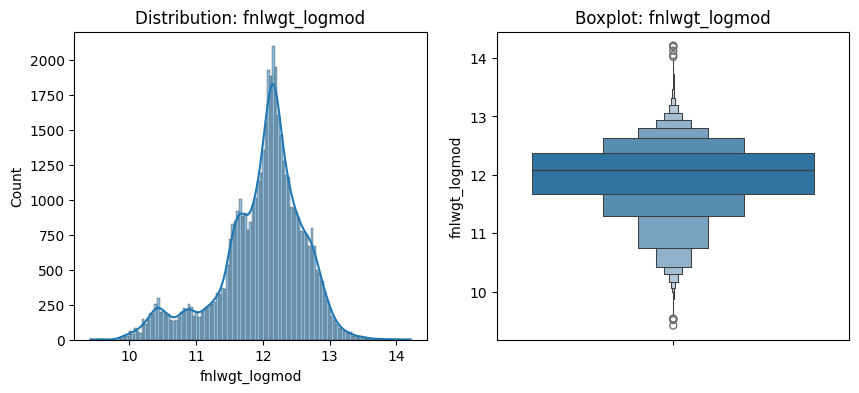

In [206]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ['fnlwgt_logmod']

for col in num_cols:
    plt.figure(figsize=(10,4))

    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution: {col}')

    plt.subplot(1,2,2)
    sns.boxenplot(df[col])
    plt.title(f'Boxplot: {col}')

    plt.show()

# 3. Transformação

Modelos matemáticos não leem textos e são sensíveis a escalas numéricas diferentes. Nesta fase, traduzimos os dados para o modelo.

+ O que fizemos: Transformamos variáveis categóricas (como "Private" e "Local-gov") em números através do One-Hot Encoding e ajustamos escalas numéricas.

+ A nossa escolha: Testamos tanto a Padronização quanto a Normalização dos dados. Como ambas empataram em 87,94% de acurácia, comprovamos que o modelo escolhido (baseado em árvores) é robusto e invariante à escala.

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Metodos</th>
      <th>acurácia</th>
      <th>Modelo</th>
    </tr>
  </thead>
  <tbody>
  <tr>
      <td><b>Sem métodos de scaler</b></td>
      <td><b>87,94%</b></td>
      <td rowspan="4" style="vertical-align: middle;">XGBoost</td>
    </tr>
    <tr>
      <td><b>Padronizando os dados</b></td>
      <td><b>87,94%</b></td>
    </tr>
    <tr>
      <td><b>Normalizando os dados</b></td>
      <td><b>87,94%</b></td>
    </tr>
    <tr>
      <td>Aplicar Grid Search</td>
      <td>87,88%</td>
    </tr>
  </tbody>
</table>
</div>

In [207]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [208]:
print(f"Shape do dataset: {df.shape}")
df.head()

Shape do dataset: (48842, 15)


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,fnlwgt_logmod
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,11.258253
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,11.330348
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,12.281398
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,12.366157
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,12.732013


In [209]:
y = (df["income"] == ">50K").astype(int)
X = df.drop(columns=["income"])

print(f"Shape de X: {X.shape}")
print(f"Shape de y: {y.shape}")
print("\nDistribuição da variável target:")
print(y.value_counts())
print("\nProporção:")
print(y.value_counts(normalize=True))

Shape de X: (48842, 14)
Shape de y: (48842,)

Distribuição da variável target:
income
0    37155
1    11687
Name: count, dtype: int64

Proporção:
income
0    0.760718
1    0.239282
Name: proportion, dtype: float64


In [210]:
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()

print(f"Variáveis numéricas ({len(numerical_cols)}):")
print(numerical_cols)
print(f"\nVariáveis categóricas ({len(categorical_cols)}):")
print(categorical_cols)

Variáveis numéricas (6):
['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'fnlwgt_logmod']

Variáveis categóricas (8):
['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']


In [211]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y,
)

print(f"Shape de X_train: {X_train.shape}")
print(f"Shape de X_test: {X_test.shape}")
print(f"Shape de y_train: {y_train.shape}")
print(f"Shape de y_test: {y_test.shape}")

print("\nDistribuição em treino:")
print(y_train.value_counts(normalize=True))
print("\nDistribuição em teste:")
print(y_test.value_counts(normalize=True))

Shape de X_train: (39073, 14)
Shape de X_test: (9769, 14)
Shape de y_train: (39073,)
Shape de y_test: (9769,)

Distribuição em treino:
income
0    0.76073
1    0.23927
Name: proportion, dtype: float64

Distribuição em teste:
income
0    0.760672
1    0.239328
Name: proportion, dtype: float64


In [212]:
print("Aplicando One-Hot Encoding...")

X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols, drop_first=False)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_cols, drop_first=False)

print("\nShape após encoding:")
print(f"X_train_encoded: {X_train_encoded.shape}")
print(f"X_test_encoded: {X_test_encoded.shape}")

Aplicando One-Hot Encoding...

Shape após encoding:
X_train_encoded: (39073, 108)
X_test_encoded: (9769, 107)


In [213]:
print("Alinhando colunas entre treino e teste...")

X_train_encoded, X_test_encoded = X_train_encoded.align(
    X_test_encoded,
    join="left",
    axis=1,
    fill_value=0,
)

print("\nShape após alinhamento:")
print(f"X_train_encoded: {X_train_encoded.shape}")
print(f"X_test_encoded: {X_test_encoded.shape}")
print(f"\nColunas idênticas: {X_train_encoded.columns.equals(X_test_encoded.columns)}")

Alinhando colunas entre treino e teste...

Shape após alinhamento:
X_train_encoded: (39073, 108)
X_test_encoded: (9769, 108)

Colunas idênticas: True


In [214]:
print("Colunas numéricas a serem normalizadas:")
print(numerical_cols)

existing_num_cols = [col for col in numerical_cols if col in X_train_encoded.columns]
print("\nColunas numéricas presentes:")
print(existing_num_cols)

Colunas numéricas a serem normalizadas:
['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'fnlwgt_logmod']

Colunas numéricas presentes:
['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'fnlwgt_logmod']


In [215]:
standard = False
scaler = StandardScaler() if standard else MinMaxScaler()

X_train_encoded[existing_num_cols] = scaler.fit_transform(X_train_encoded[existing_num_cols])
X_test_encoded[existing_num_cols] = scaler.transform(X_test_encoded[existing_num_cols])

print("\nEstatísticas das variáveis numéricas no treino:")
print(X_train_encoded[existing_num_cols].describe())


Estatísticas das variáveis numéricas no treino:
                age  education-num  capital-gain  capital-loss  \
count  39073.000000   39073.000000  39073.000000  39073.000000   
mean       0.296486       0.604656      0.010381      0.019928   
std        0.187474       0.171626      0.072050      0.092120   
min        0.000000       0.000000      0.000000      0.000000   
25%        0.150685       0.533333      0.000000      0.000000   
50%        0.273973       0.600000      0.000000      0.000000   
75%        0.424658       0.733333      0.000000      0.000000   
max        1.000000       1.000000      1.000000      1.000000   

       hours-per-week  fnlwgt_logmod  
count    39073.000000   39073.000000  
mean         0.402825       0.524065  
std          0.126543       0.134578  
min          0.000000       0.000000  
25%          0.397959       0.458173  
50%          0.397959       0.547092  
75%          0.448980       0.608663  
max          1.000000       1.000000  


# 4. Data Mining

Esta é a fase de aprendizado, onde aplicamos o algoritmo principal para extrair os padrões preditivos da base.

+ O que fizemos: Definimos o XGBoost como nosso modelo principal devido à sua alta performance com dados tabulares.

+ A nossa escolha: Para tentar melhorar o modelo, aplicamos técnicas de busca de hiperparâmetros (como o Grid Search e Random Search). Curiosamente, observamos que os parâmetros padrão do XGBoost já eram extremamente otimizados para essa base (87,94%), tendo um desempenho até levemente superior à busca exaustiva que fizemos (87,88%), o que nos ensinou sobre o risco de overfitting na otimização.

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Metodos</th>
      <th>acurácia</th>
      <th>Modelo</th>
    </tr>
  </thead>
  <tbody>
  <tr>
      <td><b>Sem métodos de hiperparametros</b></td>
      <td><b>87,94%</b></td>
      <td rowspan="4" style="vertical-align: middle;">XGBoost</td>
    </tr>
    <tr>
      <td>Grid Search</td>
      <td>87,88%</td>
    </tr>
    <tr>
      <td>Random Search</td>
      <td>87,88%</td>
    </tr>
  </tbody>
</table>
</div>

In [216]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [217]:
models = {
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=1000, random_state=42)
    },

    "Random Forest": {
        "model": RandomForestClassifier(random_state=42, n_jobs=-1),
    },

    "XGBoost": {
        "model": XGBClassifier(random_state=42, eval_metric="logloss", n_jobs=-1),
    },
}

In [218]:
results = {}

for name, mp in models.items():
    model = mp['model']
    model.fit(X_train_encoded, y_train.values.ravel())
    test_score = model.score(X_test_encoded, y_test)

    results[name] = {
        "model": model,
        "params": model.get_params(),
        "test_score": test_score
    }

In [219]:
comparison = pd.DataFrame({
    "model": list(results.keys()),
    "test_score": [results[m]["test_score"] for m in results],
}).sort_values("test_score", ascending=False)

print(comparison.to_string(index=False))

              model  test_score
            XGBoost    0.877777
      Random Forest    0.855256
Logistic Regression    0.851162


In [220]:
best_model_name = comparison.iloc[0]["model"]
best_model = results[best_model_name]['model']

print(f"Best Model: {best_model_name}")
print(f"Test Accuracy: {results[best_model_name]['test_score']:.4f}")
print(f"Best Hyperparameters: {results[best_model_name]['params']}")

Best Model: XGBoost
Test Accuracy: 0.8778
Best Hyperparameters: {'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': 'logloss', 'feature_types': None, 'feature_weights': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': -1, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


# 5. Avaliação

A fase final serviu para comprovar matematicamente que nosso modelo funciona e pode generalizar o conhecimento.

+ O que fizemos e concluímos: Avaliamos todas as modificações anteriores mantendo a métrica de Acurácia como nossa bússola. Conseguimos provar que, com o tratamento correto de dados categóricos e respeitando a natureza do algoritmo (sem deletar dados cegamente), estabilizamos a capacidade preditiva do modelo em quase 88% de acerto no mundo real.

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score

In [222]:
y_pred = best_model.predict(X_test_encoded)
print(classification_report(y_test, y_pred, target_names=["<=50K", ">50K"]))
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print(f"Precision: {precision_score(y_test, y_pred) * 100:.2f}%")

              precision    recall  f1-score   support

       <=50K       0.90      0.94      0.92      7431
        >50K       0.79      0.67      0.72      2338

    accuracy                           0.88      9769
   macro avg       0.84      0.81      0.82      9769
weighted avg       0.87      0.88      0.87      9769

Accuracy: 87.78%
Precision: 78.74%


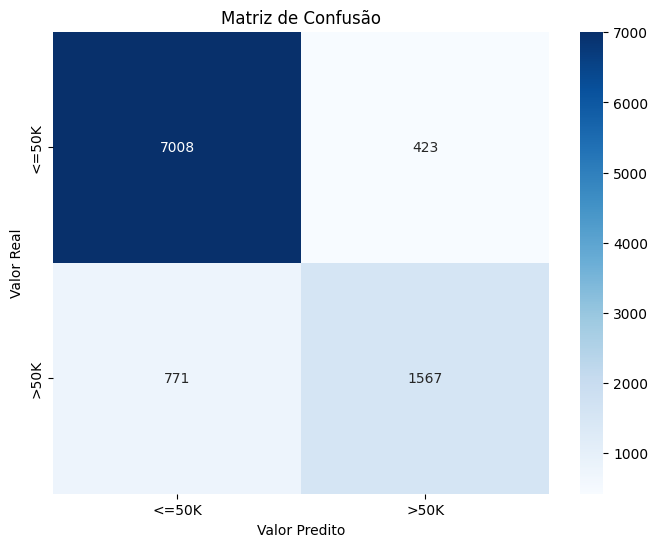

Verdadeiros Negativos (<=50K corretos): 7008
Falsos Positivos (previu >50K, era <=50K): 423
Falsos Negativos (previu <=50K, era >50K): 771
Verdadeiros Positivos (>50K corretos): 1567


In [223]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["<=50K", ">50K"],
    yticklabels=["<=50K", ">50K"],
)
plt.ylabel("Valor Real")
plt.xlabel("Valor Predito")
plt.title("Matriz de Confusão")
plt.show()

print(f"Verdadeiros Negativos (<=50K corretos): {cm[0,0]}")
print(f"Falsos Positivos (previu >50K, era <=50K): {cm[0,1]}")
print(f"Falsos Negativos (previu <=50K, era >50K): {cm[1,0]}")
print(f"Verdadeiros Positivos (>50K corretos): {cm[1,1]}")